In [1]:
# 02. neural network classificaitgon with pytorch


#### Make classification data and get it ready

In [3]:
import sklearn
from matplotlib import pyplot as plt 
import numpy as np

In [4]:
from sklearn.datasets import make_circles

# make 1000 samples

n_samples=1000

# create samples

X, y= make_circles(n_samples,noise=0.03,random_state=42)

In [5]:
print(X.size)
print(X.shape)
print(type(X))
print(X[:,0].shape)
print(X[:,0].size)

2000
(1000, 2)
<class 'numpy.ndarray'>
(1000,)
1000


In [6]:


# # Start with an empty array (or with an initial row if you prefer)
# arr = np.empty((0, 3), int)  # Assuming you know the number of columns

# # Append rows dynamically
# arr = np.vstack([arr, [1, 2, 3]])
# arr = np.vstack([arr, [4, 5, 6]])
# arr = np.vstack([arr, [7, 8, 9]])

# print(arr)
arr1 = np.empty((0, 2))
print(arr1.shape)

(0, 2)


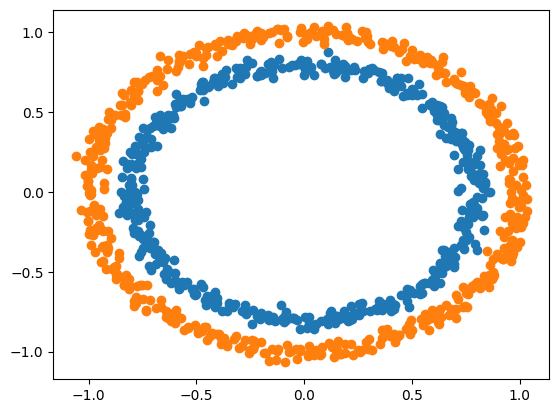

In [7]:
arr = np.empty((0, 2))
arr_2=np.empty((0, 2))
for i in range(len(y)):
    if y[i]==1:
        arr=np.vstack([arr,X[i]])
    else:
        arr_2=np.vstack([arr_2,X[i]])


plt.scatter(arr[:,0],arr[:,1])
plt.scatter(arr_2[:,0],arr_2[:,1])

In [8]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y
                     })
circles.head(10)

C:\Users\syedm\AppData\Local\Temp\ipykernel_21564\667831101.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [14]:
type(X), X.dtype, y.dtype


(torch.Tensor, torch.float32, torch.float32)

In [12]:
# turn data into tensor
import torch
print(torch.__version__)
X= torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float) # float type error--> tensor.gloat is typedef 32 i guess, numpy dtype is float64

2.0.1+cpu


TypeError: expected np.ndarray (got Tensor)

In [15]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [20]:
from sklearn.model_selection import train_test_split
X_train,_X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                 test_size=0.2,
                                                 random_state=42)

## 2. Building a Model


- Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
- Constructing a model by subclassing nn.Module.
- Defining a loss function and optimizer.
- Creating a training loop (this'll be in the next section).


In [17]:
# Shift Esc + m for the above type cell
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Steps
1 Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).

2 Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.

3 Defines a forward() method containing the forward pass computation of the model.

4 Instantiates the model class and sends it to the target device.ṁṁ


In [24]:
# 1. Construct a model that subcllasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data 
        self.layer_1=nn.Linear(in_features=2, out_features=5)
        self.layer_2=nn.Linear(in_features=5, out_features=1)
        
        # 3. Define a forward() method that outlines the forward pass
    def forward(self,x):
        return self.layers_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output
# 4. Instantiate an instance of our model class and send it to a target device
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
next(model_0.parameters()).device

device(type='cpu')

### Making neural network visual

In [ ]:
# https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.53604&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [26]:
# replicate it
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5242, -0.4813],
                      [ 0.5533, -0.1954],
                      [ 0.2226,  0.3555],
                      [-0.1470,  0.6939],
                      [-0.2800,  0.4361]])),
             ('0.bias', tensor([-0.2797, -0.2953, -0.6462, -0.5459, -0.0734])),
             ('1.weight',
              tensor([[ 0.3853, -0.1801, -0.3100,  0.1237, -0.0069]])),
             ('1.bias', tensor([-0.2856]))])

In [ ]:
# Make predictions
with torch.inference_mode():
    untrained_preds=model_o(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")